# Microsoft Movie Industry Recommendations Technical Details
# D.A. Consulting 

Dmitriy Fisch
Austin Boring
March 11, 2022 

## Overview 

The goal of our research was to ensure a future in the movie industry would be a profitable venture for Microsoft. Using a large amount of industry data pulled from many open sources, we have determined not only would a future in movies be profitable, but what criteria to focus on to maximize the probability of success. 

## Business Problem 

Our focus is to analyze what aspects of the movie industry increase profitability and chances of success. 
To guide our research, we asked:
<br>
Does the movie industry show evidence of growth over time?
What variables correlate most strongly with profitability?



## Data Understanding


***
### Sources
* We used data from multiple sources (imdb, tmdb, Rotten Tomatos, and others)

### Data Preparation

* Merging Data from different databases
* Cleaning Data 
* Removing missing data when financial data is not present
* Calculating net profit and return on investmants

### Variables
* Target Variables: net profit and return on investmants
* Independent Variables: genre, movie length, popularity 


In [19]:
# add_data2.py - downloads the data from tmbdb. 
# %run code/add_data2.py

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
from pandasql import sqldf
import json
import requests
import os
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# Initial Data Preparation:
# data_preparations.py  merges, cleans, calculates and prepairs the data for the analysis

%run code/data_preparations.py


In [41]:
# Creating filtered summary table by number of votes

full_profit_vote_df=full_profit_df.query("vote_count>200 & vote_count<20550").copy()
full_profit_vote_df.dropna(subset=["vote_count"], inplace=True)

# Creating filtered summary table by runtime (length)  of the movie
full_profit_runtime_df=full_profit_df.query("runtime<170 & runtime>60 & revenue<150000000").copy()
full_profit_runtime_df.dropna(subset=["runtime"], inplace=True)
labels=["60-69","70-79","80-89","90-99","100-109","110-119","120-129","130-139","140-149","150-159"]
full_profit_runtime_df['length_bin'] = pd.cut(x=full_profit_runtime_df['runtime'], labels=labels, bins=list(range(60,170,10)))
runtime_summary_df=full_profit_runtime_df.groupby('length_bin', as_index=False).mean()[['length_bin','revenue']]

# Creating filtered summary table by the averate vote rating
full_profit_avgvote_df=full_profit_df.query("vote_average>0").copy()
full_profit_avgvote_df.dropna(subset=["vote_average"], inplace=True)

# Creating filtered summary table by TMDB Popularity 
full_profit_pop_df=full_profit_df.query("(popularity<220 & popularity>0) & revenue<1500000000").copy()
full_profit_pop_df.dropna(subset=["popularity"], inplace=True)

# Creating filtered summary table by genre
full_profit_df=full_profit_df.query("year > 1991 and year < 2022 & runtime>60").copy()
full_profit_by_genre_filt=full_profit_by_genre.query("year > 1991 and year < 2022 & runtime>60 & ROI < 5000").copy()
genre_summary_df=full_profit_by_genre_filt.groupby(['genre'], as_index=False).mean().sort_values(by="revenue", ascending=False)[['genre','revenue']]
genre_summary_roi_df=full_profit_by_genre_filt.groupby(['genre'], as_index=False).mean().sort_values(by="ROI", ascending=False)[['genre','ROI']]


# Creating filtered  summary table by year
full_profit_year_df=full_profit_df.query("year > 1991 and year < 2022").copy()
year_summary_df=full_profit_year_df.groupby(['year'], as_index=False).sum().sort_values(by="year")[['year','revenue']]
year_summary_df=year_summary_df.query("year > 1991 and year < 2022").copy()
year_summary_df.head()

full_profit_df["year"]=full_profit_df["year"].astype(int)


## Illustrating a growing trend in the Movie Industry:

<br>


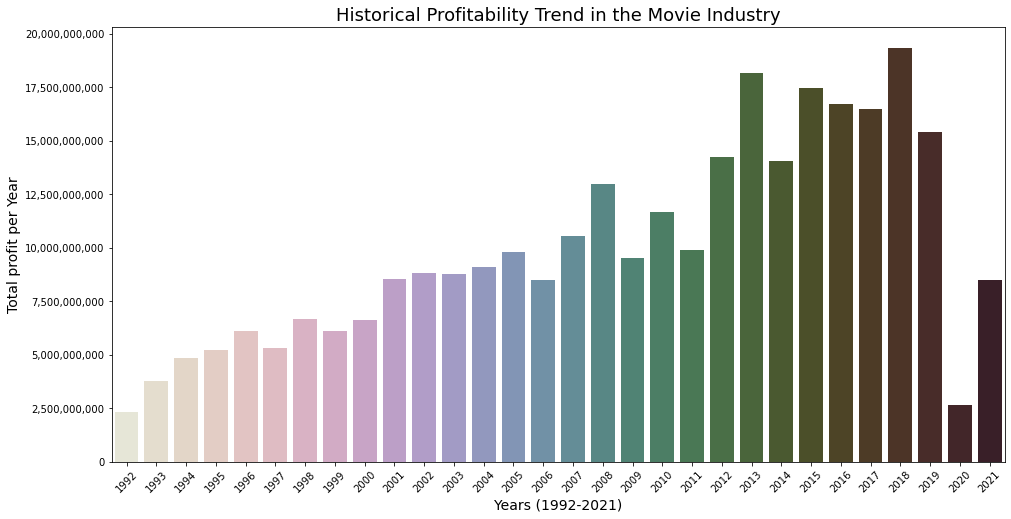

In [21]:
fig,ax=plt.subplots(  figsize=(16,8))

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.barplot(x='year', y='revenue', data=year_summary_df, ax=ax, palette="ch:r=1.65,l=.9" );

#ax.set_ylim(min(year_summary_df['revenue'])-15000000, max(year_summary_df['revenue'])+15000000);
num_of_ticks=list(range(len(year_summary_df)))
ax.set_xticks(num_of_ticks);
ax.set_xticklabels(list(year_summary_df['year']),  rotation=45);

ax.set_title("Historical Profitability Trend in the Movie Industry", fontsize=18 )
ax.set_ylabel("Total profit per Year", fontsize=14)
ax.set_xlabel("Years (1992-2021)", fontsize=14);

fig.savefig('images/profit_by_year.png')

## Exploring popularity - profit correlations:

<br>

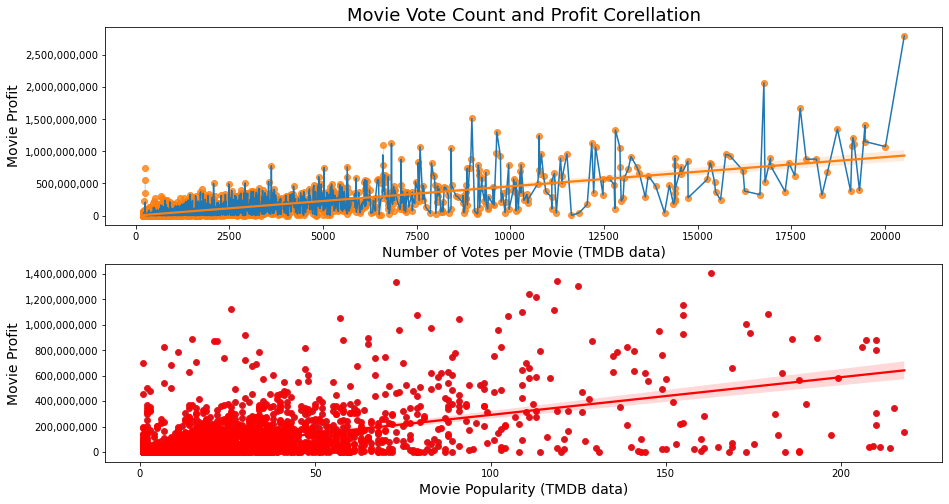

In [22]:

fig,ax=plt.subplots( nrows=2, figsize=(15,8))

pd.set_option('display.float_format', lambda x: '%.7f' % x)
ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


num_of_ticks=list(range(len(genre_summary_df['genre'])))

sns.lineplot(x='vote_count', y='revenue', data=full_profit_vote_df, ax=ax[0]);
sns.regplot(x='vote_count', y='revenue', data=full_profit_vote_df, ax=ax[0]);


sns.scatterplot(x='popularity', y='revenue', data=full_profit_pop_df, ax=ax[1]);
sns.regplot(x='popularity', y='revenue', color='red', data=full_profit_pop_df, ax=ax[1]);


ax[0].set_title("Movie Vote Count and Profit Corellation", fontsize=18 )
#ax[1].set_title("Movie Popularity and Profit Corellation", fontsize=18 )

ax[0].set_ylabel("Movie Profit", fontsize=14 )
ax[1].set_ylabel("Movie Profit", fontsize=14 )

ax[0].set_xlabel("Number of Votes per Movie (TMDB data)", fontsize=14 )
ax[1].set_xlabel("Movie Popularity (TMDB data)", fontsize=14 )



fig.savefig('images/misc_profit_correlations.png')



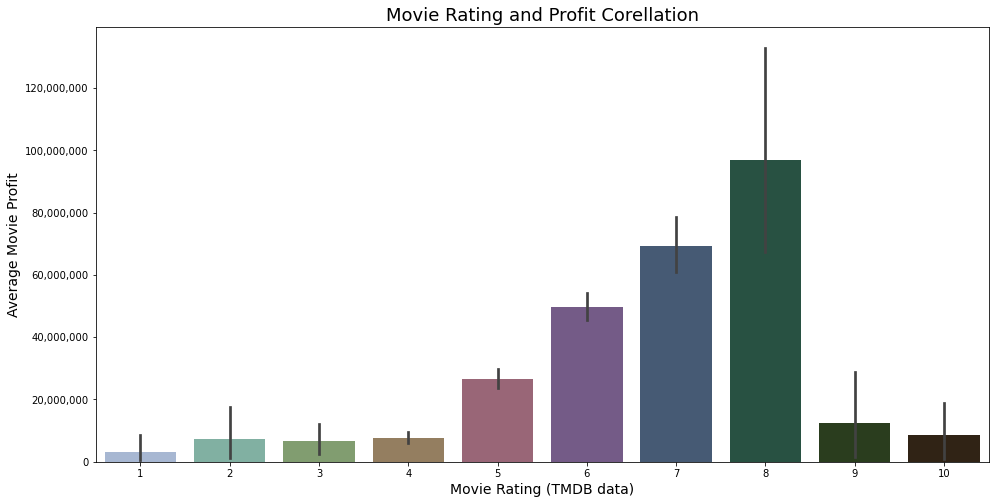

In [23]:

fig,ax=plt.subplots( figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

pd.set_option('display.float_format', lambda x: '%.7f' % x)

sns.barplot(x='vote_average', y='revenue', data=full_profit_avgvote_df, ax=ax, palette="ch:r=2.75,l=.7");


ax.set_title("Movie Rating and Profit Corellation", fontsize=18 )
ax.set_ylabel("Average Movie Profit", fontsize=14 )
ax.set_xlabel("Movie Rating (TMDB data)", fontsize=14 );

fig.savefig('images/avg_rating_correlations.png')



## Exploring  Length and Genre correlations with profit

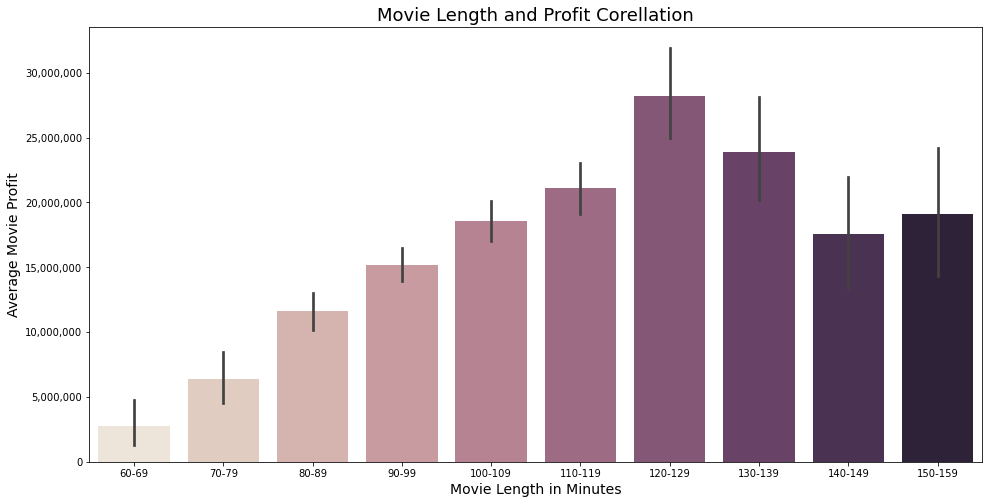

In [24]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
fig,ax=plt.subplots(  figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.barplot(x='length_bin', y='revenue', data=full_profit_runtime_df, ax=ax, palette="ch:r=.45,l=.9");

ax.set_title("Movie Length and Profit Corellation", fontsize=18 )
ax.set_ylabel("Average Movie Profit", fontsize=14 )
ax.set_xlabel("Movie Length in Minutes", fontsize=14 );

fig.savefig('images/optimal_movie_length.png')



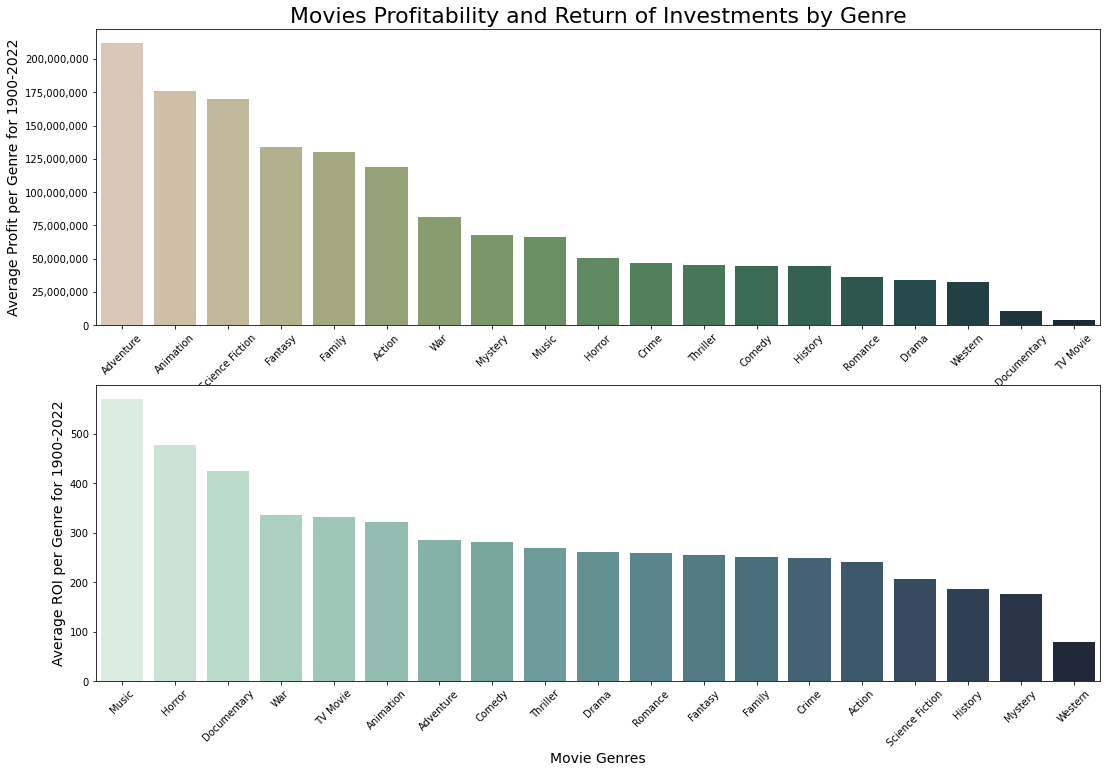

In [47]:
fig,ax=plt.subplots( nrows=2, figsize=(18,12))

pd.set_option('display.float_format', lambda x: '%.7f' % x)
ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



sns.barplot(x='genre', y='revenue', data=genre_summary_df, ax=ax[0], palette="ch:r=-.75,l=.8");
sns.barplot(x='genre', y='ROI', data=genre_summary_roi_df, ax=ax[1], palette="ch:r=-.35,l=.9");

num_of_ticks=list(range(len(genre_summary_df['genre'])))
ax[0].set_xticks(num_of_ticks);
ax[0].set_xticklabels(list(genre_summary_df['genre']),  rotation=45);
ax[0].set_title("Movies Profitability and Return of Investments by Genre", fontsize=22 )
ax[0].set_ylabel("Average Profit per Genre for 1900-2022", fontsize=14)
ax[0].set_xlabel("Movie Genres", fontsize=14);

num_of_roi_ticks=list(range(len(genre_summary_roi_df['genre'])))
ax[1].set_xticks(num_of_roi_ticks);
ax[1].set_xticklabels(list(genre_summary_roi_df['genre']),  rotation=45);
#ax[1].set_title("Movies Retrun of Investments by Genre", fontsize=22 )
ax[1].set_ylabel("Average ROI per Genre for 1900-2022", fontsize=14)
ax[1].set_xlabel("Movie Genres", fontsize=14);

fig.savefig('images/profit_and_roi_by_genre.png')

## Evaluation 
Our results are based on data sourced from the global movie industry over a span of 30 years and because of this the results are valid in real world applications. Our models are very beneficial to a company fresh into the movie industry as guiding principles to ensure profitability in an unfamiliar business. 


## Conclusions 
- The Movie industry has proven to be consistently profitable, with stable growth over the past 30 years
- All publicity is good publiciity, popularity correlates strongly with profitbaility
    - Promotion of any kind will contribute to success
- Most profitbale
    - Genre : Adventure / Science Fiction
    - Rating: Perfect ratings (9-10) are too niche to be extremely profitabled 
    - Length: Slightly more than 2 hours long


In [38]:
#genre_summary_roi_df
full_profit_by_genre.shape#.query("ROI>5000")

(7891, 15)